[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-02-13  135.289993  136.500000  131.169998  131.559998  197430000   
2025-02-14  138.850006  139.250000  135.500000  136.479996  195479600   
2025-02-18  139.399994  143.440002  137.929993  141.270004  219176600   
2025-02-19  139.229996  141.360001  137.220001  139.509995  167536000   
2025-02-20  140.110001  140.660004  136.789993  140.029999  143903600   

Price        EMA_short    EMA_long      MACD Signal_Line MACD_Histogram  \
Ticker                                                                    
Date                                                                      
2025-02-13  130.273038  131.583967 -1.310929   -2.498262       1.187334   
2025-02-14  131.592572  132.122192 -0.529620   -2.104534       1.574914   
2025-02-18  132.793714  132.661289  0.13

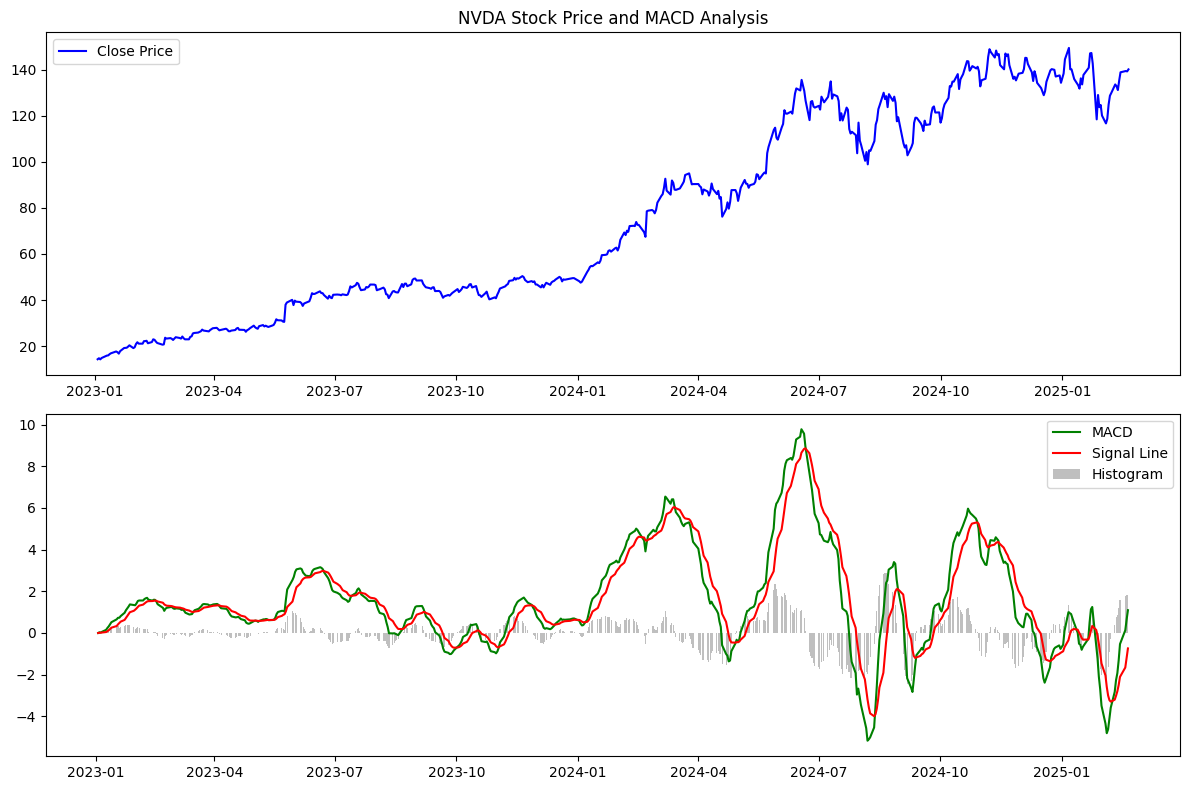

In [ ]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt


# Fetch historical data for NVDA
ticker = 'NVDA'
start_date = '2023-01-01'
end_date = '2025-02-21'

# Download data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

def calculate_macd(df, short_period=12, long_period=26, signal_period=9):
    # Calculate short and long-term EMAs
    df['EMA_short'] = df['Close'].ewm(span=short_period, adjust=False).mean()
    df['EMA_long'] = df['Close'].ewm(span=long_period, adjust=False).mean()
    
    # Calculate MACD and Signal Line
    df['MACD'] = df['EMA_short'] - df['EMA_long']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    
    # Calculate MACD Histogram
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']
    
    # Detect Bullish and Bearish Crossovers
    df['Bullish_Crossover'] = (df['MACD'] > df['Signal_Line']) & \
                              (df['MACD'].shift(1) <= df['Signal_Line'].shift(1))
    df['Bearish_Crossover'] = (df['MACD'] < df['Signal_Line']) & \
                              (df['MACD'].shift(1) >= df['Signal_Line'].shift(1))
    
    return df

# Calculate MACD for NVDA
df = calculate_macd(df)

# Print sample data
print(df.tail())


# Plot Closing Price and MACD
plt.figure(figsize=(12, 8))

# Subplot 1: Closing Price
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} Stock Price and MACD Analysis')
plt.legend()

# Subplot 2: MACD and Signal Line
plt.subplot(2, 1, 2)
plt.plot(df['MACD'], label='MACD', color='green')
plt.plot(df['Signal_Line'], label='Signal Line', color='red')
plt.bar(df.index, df['MACD_Histogram'], label='Histogram', color='gray', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()